# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode

init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

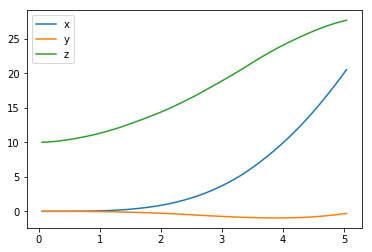

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

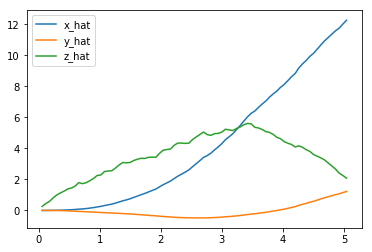

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

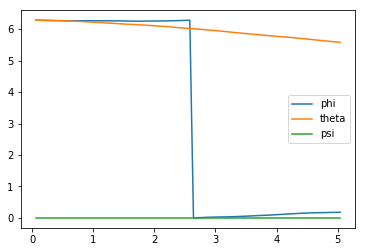

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

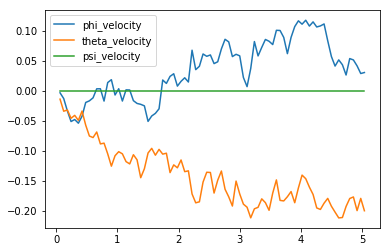

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

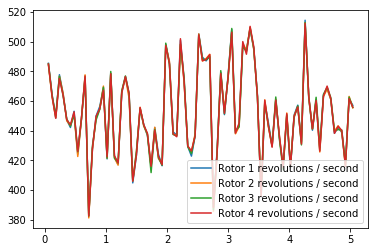

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ 20.53561982  -0.30225361  27.69086596   0.17985986   5.58074909   0.        ]
[ 12.25433314   1.22454904   2.07716346]
[ 0.03083238 -0.20016621  0.        ]


From comparing graphs (above) and the vectors above:

    pose = [x, y, z, phi, theta, psi]
    v = [x_velocity, y_velocity, z_velocity]
    angular_v = [phi_velocity, theta_velocity, psi_velocity] (radians/second)

In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -0.568 (best =  -0.081), noise_scale = 3.2625

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [13]:
## TODO: Train your agent here.

# Task: Takeoff

import sys
import pandas as pd
from agents.agent import DDPG
from takeoff import Task2

init_pose = np.array([0., 0., 0., 0., 0., 0.])  # initial position x=y=z=0
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'Takeoff.txt'                      # file name for saved results

num_episodes = 500

target_pos = np.array([0., 0., 200.])             # It moves from z=0 to z=200 (or above) (Takeoff)

task2 = Task2(init_pose=init_pose, init_velocities=init_velocities, init_angle_velocities=init_angle_velocities, runtime=5.,target_pos=target_pos)
agent = DDPG(task2)
done = False
labels = ['episode', 'reward', 'x', 'y', 'z', 'phi', 'theta', 'psi']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)

    for i_episode in range(1, num_episodes+1):
        state = agent.reset_episode() # start a new episode
        cum_reward = 0
        while True:
            action = agent.act(state) 
            next_state, reward, done = task2.step(action)
            agent.step(action, reward, next_state, done)
            state = next_state
            cum_reward += reward
            if done:
                to_write = [i_episode] + [cum_reward] + list(task2.sim.pose)
                for ii in range(len(labels)):
                    results[labels[ii]].append(to_write[ii])
                writer.writerow(to_write)
                print("\rEpisode = {:4d}, Reward = {:7.3f}, Cummulative Reward = {:7.3f}".format(i_episode, reward, cum_reward), end="") # 
                #print(task2.sim.pose, end="") #Checking movement of quadcopters during the simulation
                
                break
        sys.stdout.flush()
    

Episode =  500, Reward =  -3.000, Cummulative Reward =  -3.0000

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

Using adapted version of original reward function as provided in sample code. Optimizer for actor and critic have defined learning rates (instead of leaving blank). Neural Networks (NNs) have added regularizers. Adjusted two parameters in the regulators of the critic action pathway. Two NNs had dissimilar values compared to the other NNs. This improved convergence. In any case, there is learning. Picking this model for this exercise.

        #self.exploration_mu = 0
        #self.exploration_theta = 0.15
        #self.exploration_sigma = 0.2
        #reward = np.tanh(-.2*(abs(self.sim.pose[:3] - self.target_pos)).sum())

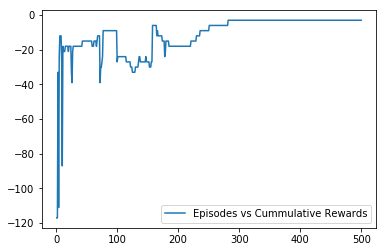

In [14]:
## TODO: Plot the rewards.
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['episode'], results['reward'], label='Episodes vs Cummulative Rewards')
plt.legend()
_ = plt.ylim()

In [12]:
# How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)
print("Mean Reward over last 10 episodes: {}".format(np.sum(results['reward'][-10:])/10))

Mean Reward over last 10 episodes: -6.0


### Previous experiments before final version:

Using adapted version of original reward function as provided in sample code. Optimizer for actor and critic have defined learning rates (instead of leaving blank). NNs have added regularizers. There is learning. However, it appears to have less learning going on compared to the final version.

        #self.exploration_mu = 0
        #self.exploration_theta = 0.15
        #self.exploration_sigma = 0.2
        #reward = np.tanh(1-.3*(abs(self.sim.pose[:3] - self.target_pos)).sum())
        

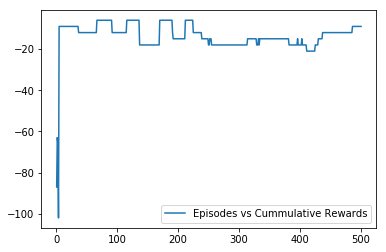

In [18]:
## TODO: Plot the rewards.
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['episode'], results['reward'], label='Episodes vs Cummulative Rewards')
plt.legend()
_ = plt.ylim()

Using adapted version of original reward function as provided in sample code. Optimizer for actor and critic have defined learning rates (instead of leaving blank). NNs have added regularizers. There is learning. Very similar to final version with minor factor change in reward function.

        #self.exploration_mu = 0
        #self.exploration_theta = 0.15
        #self.exploration_sigma = 0.2
        #reward = np.tanh(-.3*(abs(self.sim.pose[:3] - self.target_pos)).sum())

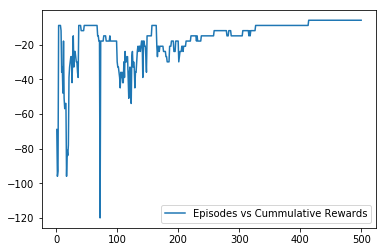

In [27]:
## TODO: Plot the rewards.
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['episode'], results['reward'], label='Episodes vs Cummulative Rewards')
plt.legend()
_ = plt.ylim()

Using adapted version of original reward function as provided in sample code. Optimizer for actor and critic have defined learning rates (instead of leaving blank). NNs have added regularizers. There is learning. Exploring a different reward function in which each dimension (x,y,z) is evaluate separately. Also, the resulting curve converges from higher to lower. 

        #self.exploration_mu = 0
        #self.exploration_theta = 0.15
        #self.exploration_sigma = 0.2
        #reward = 1.0-0.2*np.tanh(diff_pos[0])-0.2*np.tanh(diff_pos[1])-1.0*np.tanh(diff_pos[2])

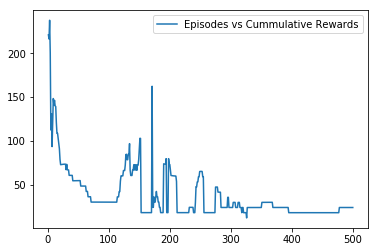

In [19]:
## TODO: Plot the rewards.
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['episode'], results['reward'], label='Episodes vs Cummulative Rewards')
plt.legend()
_ = plt.ylim()

Using adapted version of original reward function as provided in sample code. Optimizer for actor and critic have defined learning rates (instead of leaving blank). NNs have added regularizers. There is learning. Very similar to final. Less number of episodes.

        #self.exploration_mu = 0
        #self.exploration_theta = 0.15
        #self.exploration_sigma = 0.2
        #reward = np.tanh(-.2*(abs(self.sim.pose[:3] - self.target_pos)).sum())

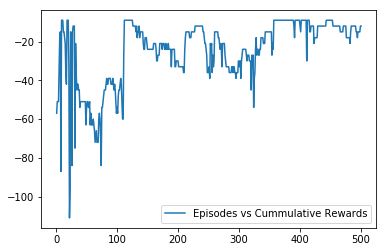

In [11]:
## TODO: Plot the rewards.
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['episode'], results['reward'], label='Episodes vs Cummulative Rewards')
plt.legend()
_ = plt.ylim()

#### For the simulations above, the number of nodes was incremented from original example provided. There were also additional hidden layers added.

Using adapted version of original reward function as provided in sample code. Optimizer for actor and critic have defined learning rates (instead of leaving blank). NNs have added regularizers. However, number of nodes for NNs is small as originally provided in the sample code.

        #self.exploration_mu = 0
        #self.exploration_theta = 0.15
        #self.exploration_sigma = 0.2
        #reward = 1.0-0.2*(abs(self.sim.pose[:3] - self.target_pos)).sum()

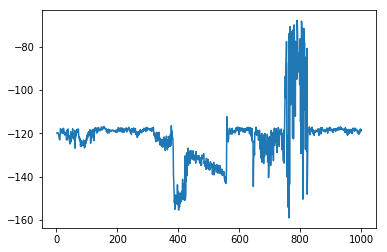

In [62]:
## TODO: Plot the rewards.
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['episode'], results['reward'])
plt.legend()
_ = plt.ylim()

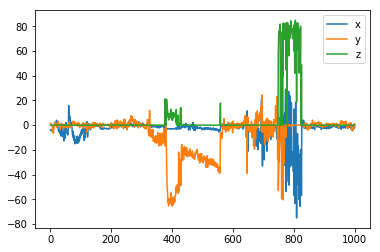

In [63]:
## Plot the position.
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['episode'], results['x'], label='x')
plt.plot(results['episode'], results['y'], label='y')
plt.plot(results['episode'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

In the cell below:
Using original reward function as provided in sample code. 
Basically there is practically no learning. The range of learning by the agent is very small (if any).
There are no learning rates specified on adam optimizer and no regularizers in NNs.

        #self.exploration_mu = 0
        #self.exploration_theta = 0.15
        #self.exploration_sigma = 0.2
        #reward = 1.-.3*(abs(self.sim.pose[:3] - self.target_pos)).sum() [Original provided reward function]

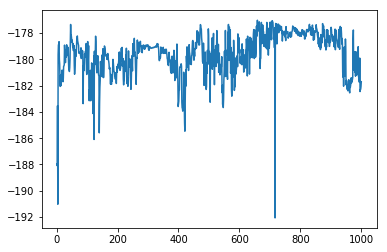

In [36]:
## TODO: Plot the rewards.
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['episode'], results['reward'])
plt.legend()
_ = plt.ylim()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

For the task, I created a new file named takeoff.py as the task that I pick to model is the Takeoff. This new task is based on the originally provided task.py file. On this task I focused my efforts on finding the right reward function for this exercise. In this case, I adjusted the originally provided reward function to the new one: 

reward = np.tanh(-.2*(abs(self.sim.pose[:3] - self.target_pos)).sum())

This reward function varies to the original one (reward = 1.-.3*(abs(self.sim.pose[:3] - self.target_pos)).sum()) as follows: 

    1.1) I intended to keep values between -1 and 1. Like the sigmoid function. However, I ended up using tanh as it is included in numpy. 
    1.2) The part of the function "abs(self.sim.pose[:3] - self.target_pos)" is an estimate for computing the magnitude of the resulting vector. In other words, how far is the Quadcopter from the target.
    1.3) I tested a number of reward functions as you can see in the results in the cells (above) and in the takeoff.py file itself. A few appeared to be good candidates from my perspective. However, I have to test so many parameters for the agent that maybe the original function could have not been as bad as I thought. At the end, I picked the reward function that appear to help the model with faster convergence.
    
At the end, the reward function might be applicable to any Quadcopter scenario (hover, takeoff, etc.). Given this I could have resorted at the end to just use the task.py file instead of creating the takeoff.py that I ended up creating. However, I didn't have a chance to test with other Quadcopter scenarios to confirm this comment.
    

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

    2.1) For creating the agent I ended up selecting the Deep Deterministics Policy Gradients (DDPG) model that was given in the Nanodegree. I ended up using the DDPG model that was provided in the hints section for this exercise. I used the DDPG model provided as a baseline. While this proved to be a bit challenging at the beginning, I believed it end up as a good experience in applying DDPG.
    2.2) As far as choice of DDPG parameters I ended up using the originally recommended values for the parameters: noise process (mu, theta, sigma), replay memory (buffer and batch sizes), and algorithm parameters (gamma and tau). I played a little bit with the noise parameters after reading the source in the wikipedia (https://en.wikipedia.org/wiki/Ornstein%E2%80%93Uhlenbeck_process). I even tried some values (mu=1.2, theta=1.0, sigma=0.3). However, I didn't see any effect. This perhaps due to fact that I was still adjusting other parameters in the CNNs, optimizers, etc., and it was still hard to pinpoint any improvement caused by adjusting the noise process parameters. 
    2.3) The neural networks that I used for the actor are as follows:
    2.3.0) Input layer from states.
    2.3.1) For the actor, I used the 3 hidden network recommended in the model with some adjustments, plus I ended up another hidden layer:
    Dense(units=100) with L2 kernel regularization, batch normalization, and Relu actication
    Dense(units=200) with L2 kernel regularization, batch normalization, and Relu actication
    Dense(units=400) with L2 kernel regularization, batch normalization, and Relu actication
    Dense(units=200) with L2 kernel regularization, batch normalization, and Relu actication
    2.3.4) Outout layer with sigmoid activation
    2.3.5) As part of the Actor, we have to define an optimizer. It was an Adam optimizer with no parameters. It was important later to play around with learning rate parameter as this helps with convergence. At some point it was 0.001 and I scaled it down to 0.0001. This helped with faster convergence.
    2.3.6) It also proved important to play with the L2 kernel regularization parameters. All of them were set to 0.0001. This factor helped improve convergence.
    2.4) The neural networks that I used for the critic are as follows:
    2.4.1) We two input layers: states and actions.
    2.4.2) For each the action and state pathway, I started with the 2 recommended hidden layers and added one layer. For each pathway, there is:
    Dense(units=100) with L2 kernel regularization, batch normalization, and Relu actication
    Dense(units=200) with L2 kernel regularization, batch normalization, and Relu actication
    Dense(units=200) with L2 kernel regularization, batch normalization, and Relu actication
    2.4.3) Final output layer to produce action values (Q values). One Dense network with one node with added random normal initializer as this parameter was not specified. 
    2.4.4) As part of the Critic, we have to define an optimizer. It was an Adam optimizer with no parameters. It was important later to play around with learning rate parameter as this helped with faster convergence. The learning rate ended at 0.001. This helped with convergence. I debated to scale it down to 0.0001. The rewards curve converged even faster (not shown). However, I wasn't sure if it is OK to coverge too fast or if it is better to run more scenarios instead for learning. This could be a topic for future study.
    2.4.5) It also proved important to play with the L2 kernel regularization parameters. All of them were set to 0.0001. This factor helped improve convergence.

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

    3.1) Once that I decided on the final reward function and that I had adjusted all parameters that in my mind needed adjusted and the model was good to go (for now), I would say that it was not an easy task to learn. From the 500 run episodes, it took almost 300 episodes to converge.
    3.2) The learning was gradual as it went from almost -120 to converge to -6 progressively. Since it was increasing, it can be argued that the model was learning.
    3.2.1) There was a particular run (for the final scenario) when I was playing with the learning rates for the agent and client, respectively, when it appeared to converge extremely fast, like an aha moment. I opted to have the parameters in such a way to have the agent learn not too fast over a not too small number of episodes. However, I'm not sure yet what is the best strategy in learning. Would the agent make good decisions if it only saw a few scenarios? Perhaps better to be safe and expose agent to many scenarios.
    3.3) The final performance of the agent was very stable. It was -6 all over. Therefore the mean reward was -6.    


**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

    4.1) Thanks to the sample code it was not a very hard task. However, I wouldn't say it was easy. In my case, I opted for using the DDPG sample code provided. However, there is so many parameters to tune. It is not a trivial task. It took me a long time to tinker and test on different parameters. I had to go Keras a number of times to see what parameters were not specified and perhaps needed to be specified instead of working with defaults. 
    4.2) Specifying the parameters was not easy task as there were many of them in the neural networks, optimizer, etc. I think the hardest part was to figure out when I was making progress with the agent and it was not that I selected a bad reward function what was the culprit for my agent to really start learning.
    